In [1]:
%load_ext autoreload
%autoreload 2

### Imports

In [2]:
from qiskit_metal import draw, Dict, designs, MetalGUI
from qiskit_metal.toolbox_metal import math_and_overrides
from qiskit_metal.qlibrary.core import QComponent
import qiskit_metal as metal
from just_claw import TransmonClaw
from qiskit_metal.qlibrary.terminations.launchpad_wb import LaunchpadWirebond
from qiskit_metal.qlibrary.terminations.short_to_ground import ShortToGround
from qiskit_metal.qlibrary.tlines.straight_path import RouteStraight
from qiskit_metal.qlibrary.tlines.anchored_path import RouteAnchors
from qiskit_metal.qlibrary.tlines.mixed_path import RouteMixed
from qiskit_metal.qlibrary.qubits.transmon_cross import TransmonCross
from qiskit_metal.qlibrary.tlines.meandered import RouteMeander
from qiskit_metal.qlibrary.terminations.open_to_ground import OpenToGround
from qiskit_metal.qlibrary.couplers.coupled_line_tee import CoupledLineTee
from qiskit_metal.qlibrary.couplers.cap_n_interdigital_tee import CapNInterdigitalTee
from qiskit_metal.qlibrary.couplers.line_tee import LineTee

from collections import OrderedDict

import numpy as np

# Data Collection

## WM1

In [3]:
cpw1_opts = Dict(
                lead = Dict(end_straight = '70um',
                ),
                fillet = '49.9um',
                total_length = '3900um',
                trace_width = "11.7um",
                meander = Dict(spacing = '100um',
                               asymmetry = '-150um'),
                trace_gap = '5.1um',)

cpw2_opts = Dict(
                lead = Dict(end_straight = '70um',
                ),
                fillet = '49.9um',
                total_length = '3700um',
                trace_width = "11.7um",
                meander = Dict(spacing = '100um',
                               asymmetry = '-150um'),
                trace_gap = '5.1um')

cpw3_opts = Dict(
                lead = Dict(start_straight = '100um',
                            end_straight = '170um'),
                fillet = '49.9um',
                total_length = '8150um',
                trace_width = "11.7um",
                meander = Dict(spacing = '100um',
                               asymmetry = '-150um'),
                trace_gap = '5.1um')

cpw4_opts = Dict(
                lead = Dict(start_straight = '10um',
                            end_straight = '70um'),
                fillet = '49.9um',
                total_length = '3550um',
                trace_width = "11.7um",
                meander = Dict(spacing = '100um',
                               asymmetry = '-150um'),
                trace_gap = '5.1um')

cpw5_opts = Dict(
                lead = Dict(start_straight = '100um'),
                fillet = '49.9um',
                total_length = '8025um',
                trace_width = "11.7um",
                meander = Dict(spacing = '100um',
                               asymmetry = '-150um'),
                trace_gap = '5.1um')

cpw6_opts = Dict(
                lead = Dict(start_straight = '100um',
                            end_straight = '70um'),
                fillet = '49.9um',
                total_length = '8000um',
                trace_width = "11.7um",
                meander = Dict(spacing = '100um',
                               asymmetry = '-150um'),
                trace_gap = '5.1um')

claw1_opts = dict(
    connection_pads=dict(
        readout = dict(connector_location = '90', 
                 connector_type = '0', 
                 claw_length = '215um',
                 ground_spacing = '10um', 
                 claw_gap = '5.1um', 
                 claw_width = '15um',
                 claw_cpw_width = "11.7um",
                 claw_cpw_length = '0um'
                 ),
    ),
    cross_width = '30um',
    cross_length = '240um',
    cross_gap = '30um',
    orientation = '-90',
    pos_x = '-1500um',
    aedt_hfss_inductance = 9.686E-9
)

claw2_opts = dict(
    connection_pads=dict(
        readout = dict(connector_location = '90', 
                 connector_type = '0', 
                 claw_length = '215.9um',
                 ground_spacing = '9.1um', 
                 claw_gap = '5.1um', 
                 claw_width = '15.9um',
                 claw_cpw_width = "11.7um",
                 claw_cpw_length = 0),
    ),
    cross_width = '30.9um',
    cross_length = '240.9um',
    cross_gap = '29.1um',
    orientation = '-90',
    pos_x = '-1500um',
    aedt_hfss_inductance = 11.268E-9
)

claw3_opts = dict(
    connection_pads=dict(
        readout = dict(connector_location = '90', 
                 connector_type = '0', 
                 claw_length = '185.9um',
                 ground_spacing = '4.1um', 
                 claw_gap = '5.1um', 
                 claw_width = '15.9um',
                 claw_cpw_width = "11.7um",
                 claw_cpw_length = 0),
    ),
    cross_width = '30.9um',
    cross_length = '200.9um',
    cross_gap = '29.1um',
    orientation = '-90',
    pos_x = '-2000.9um',
    aedt_hfss_inductance = 10.471E-9
)

claw4_opts = dict(
    connection_pads=dict(
        readout = dict(connector_location = '90', 
                 connector_type = '0', 
                 claw_length = '215.9um',
                 ground_spacing = '9.1um', 
                 claw_gap = '5.1um', 
                 claw_width = '15.9um',
                 claw_cpw_width = "11.7um",
                 claw_cpw_length = '0'),
    ),
    cross_width = '30.9um',
    cross_length = '240.9um',
    cross_gap = '29.1um',
    orientation = '-90',
    pos_x = '-1500um',
    aedt_hfss_inductance = 13.816E-9
)

claw5_opts = dict(
    connection_pads=dict(
        readout = dict(connector_location = '90', 
                 connector_type = '0', 
                 claw_length = '185um',
                 ground_spacing = '5um', 
                 claw_gap = '5.1um', 
                 claw_width = '10um',
                 claw_cpw_width = "11.7um",
                 claw_cpw_length = 0),
    ),
    cross_width = '30um',
    cross_length = '200um',
    cross_gap = '30um',
    orientation = '-90',
    pos_x = '-2000um',
    aedt_hfss_inductance = 13.235E-9
)

claw6_opts = dict(
    connection_pads=dict(
        c = dict(connector_location = '90', 
                 connector_type = '0', 
                 claw_length = '200.9um',
                 ground_spacing = '10.9um', 
                 claw_gap = '5.1um', 
                 claw_width = '10.9um',
                 claw_cpw_width = "11.7um",
                 claw_cpw_length = '0'),
    ),
    cross_width = '30.9um',
    cross_length = '220.9um',
    cross_gap = '29.1um',
    orientation = '-90',
    pos_x = '-2000um',
    aedt_hfss_inductance = 12.679E-9
)

cplr1_opts = Dict(prime_width = "11.7um",
                prime_gap = '5.1um',
                second_width = "11.7um",
                second_gap = '5.1um',
                coupling_space = '7.9um',
                coupling_length = '225um',
                open_termination = False,
                orientation = '-90',
                down_length = '50um')

cplr2_opts = Dict(prime_width = "11.7um",
                prime_gap = '5.1um',
                second_width = "11.7um",
                second_gap = '5.1um',
                coupling_space = '7.9um',
                coupling_length = '225um',
                open_termination = False,
                orientation = '-90',
                down_length = '50um')

cplr3_opts = Dict(orientation = '-90',
                  prime_width = "11.7um",
                  prime_gap = '5.1um',
                  second_width = "11.7um",
                  second_gap = '5.1um',
                  cap_gap = '4.1um',
                  cap_width = '10.9um',
                  cap_gap_ground = '5.1um',
                  finger_length = '30.9um',
                  finger_count = '10',
                  cap_distance = '50.9um',)

cplr4_opts = Dict(prime_width = "11.7um",
                prime_gap = '5.1um',
                second_width = "11.7um",
                second_gap = '5.1um',
                coupling_space = '7.9um',
                coupling_length = '225um',
                open_termination = False,
                orientation = '-90',
                down_length = '50um')

cplr5_opts = Dict(orientation = '-90',
                  prime_width = "11.7um",
                  prime_gap = '5.1um',
                  second_width = "11.7um",
                  second_gap = '5.1um',
                  cap_gap = '4.1um',
                  cap_width = '10.9um',
                  cap_gap_ground = '5.1um',
                  finger_length = '30.9um',
                  finger_count = '7',
                  cap_distance = '50.9um',)

cplr6_opts = Dict(orientation = '-90',
                  prime_width = "11.7um",
                  prime_gap = '5.1um',
                  second_width = "11.7um",
                  second_gap = '5.1um',
                  cap_gap = '4.1um',
                  cap_width = '10.9um',
                  cap_gap_ground = '5.1um',
                  finger_length = '30.9um',
                  finger_count = '4',
                  cap_distance = '50.9um',
                  )

In [4]:
wm1 = {
    "cpw_opts" : [cpw1_opts, cpw2_opts, cpw3_opts, cpw4_opts, cpw5_opts, cpw6_opts],
    "claw_opts" : [claw1_opts, claw2_opts, claw3_opts, claw4_opts, claw5_opts, claw6_opts],
    "coupler_opts" : [cplr1_opts, cplr2_opts, cplr3_opts, cplr4_opts, cplr5_opts, cplr6_opts],
}

## MUNINN

In [5]:
cpw1_opts = Dict(chip='main',
                        fillet='50um',
                        total_length = '3.58mm',
                        lead = dict(start_straight = '10um', end_straight = '10um',
                                   ), trace_width = '10um', meander= dict(spacing='120um', asymmetry='-0.15'))

cpw2_opts = Dict(chip='main',
                        fillet='50um',
                        total_length = '3.5mm',
                        lead = dict(start_straight = '10um', end_straight = '10um',
                                   ), trace_width = '10um', meander= dict(spacing='120um', asymmetry='-0.15'))

cpw3_opts = Dict(chip='main',
                        fillet='50um',
                        total_length = '3.46mm',
                        lead = dict(start_straight = '10um', end_straight = '10um',
                                   ), trace_width = '10um', meander= dict(spacing='120um', asymmetry='-0.15'))

claw1_opts = dict(chip='main', make_fl=False, cross_gap = '30um', cross_width = '30um', cross_length= '185um', 
    connection_pads=dict(
        dl1 = dict(connector_location = '0', connector_type = '1', ground_spacing='30um'),
        b1 = dict(connector_location = '180', connector_type = '0', claw_length = '115um', claw_width = '7um', claw_gap= '6um', ground_spacing='4um'),
        r1 = dict(connector_location = '90', connector_type = '0', claw_length = '140um', claw_width = '10um', claw_gap= '6um', ground_spacing='10um'), 
    
    ),
)

claw2_opts = dict(chip='main', make_fl=False, cross_gap = '30um', cross_width = '30um', cross_length= '205um', 
    connection_pads=dict(
        #dl2 = dict( connector_location = '180', connector_type = '1', ground_spacing='120um'),
        b2 = dict(connector_location = '-180', connector_type = '0', claw_length = '110um', claw_width = '7um', claw_gap= '6um', ground_spacing='4um'),
        r2 = dict(connector_location = '90', connector_type = '0', claw_length = '135um', claw_width = '10um', claw_gap= '6um', ground_spacing='10um'), 
        b22 = dict(connector_location = '180', connector_type = '0', claw_length = '145um', claw_width = '7um', claw_gap= '6um', ground_spacing='4um'),
    ),
)

claw3_opts = Dict(chip='main', make_fl=False, cross_gap = '30um', cross_width = '30um', cross_length= '195um', 
    connection_pads = dict(
        #dl2 = dict( connector_location = '180', connector_type = '1'),
        b3 = dict(connector_location = '-180', connector_type = '0', claw_length = '130um', claw_width = '7um', claw_gap= '6um'),
        r3 = dict(connector_location = '90', connector_type = '0', claw_length = '110um', claw_width = '10um', claw_gap= '6um', ground_spacing='10um'), 
    
    ),
)

cplr1_opts = Dict(coupling_length='200um', coupling_space='7um', down_length='30um', orientation = "-90", open_termination=False)
cplr2_opts = Dict(coupling_length='200um', coupling_space='7um', down_length='30um', orientation = "-90", open_termination=False)
cplr3_opts = Dict(coupling_length='200um', coupling_space='7um', down_length='30um', orientation = "-90", open_termination=False)

In [6]:
muninn = {
    "cpw_opts" : [cpw1_opts, cpw2_opts, cpw3_opts],
    "claw_opts" : [claw1_opts, claw2_opts, claw3_opts],
    "coupler_opts" : [cplr1_opts, cplr2_opts, cplr3_opts],
}

In [7]:
devices = {
    "wm1" : wm1,
    "muninn" : muninn
}

# Creating a Simulation Unit

In [8]:
def create_claw(opts):
    claw = TransmonClaw(design, 'claw', options=opts)
    return claw

def create_coupler(opts):
    cplr = CapNInterdigitalTee(design, 'cplr', options = opts) if "finger_count" in opts.keys() else CoupledLineTee(design, 'cplr', options = opts)
    return cplr

def create_cpw(opts):
    opts.update({"pin_inputs" : Dict(start_pin = Dict(component = 'cplr',
                                                    pin = 'second_end'),
                                   end_pin = Dict(component = 'claw',
                                                  pin = 'readout'))})
    cpw = RouteMeander(design, 'cpw', options = opts)
    return cpw

In [9]:
design = metal.designs.design_planar.DesignPlanar()
gui = metal.MetalGUI(design)
design.overwrite_enabled = True

design._chips.main.size.size_x = '5mm'
design._chips.main.size.size_y = '5mm'

In [ ]:
test_hfss = design.renderers.hfss

# Simulation Engine: Eigenmodal

### Material Properties Settings

In [ ]:
from pyaedt import Hfss

def setMaterialProperties(projectname,designname,solutiontype="Eigenmode"):
    """Interfaces w/ ANSYS via pyEPR for more custom automation.
    1. Connect to ANSYS
    2. Change Silicon permitivity to 11.45; represents ultra cold silicon.
    3. Checks for prexisting Setups, deletes them...
    """

    aedt = Hfss(projectname=projectname, 
                designname=designname, 
                solution_type=solutiontype,
                new_desktop_session=False, 
                close_on_exit=False)


    ultra_cold_silicon(aedt)
    delete_old_setups(aedt)

    aedt.release_desktop(close_projects=False, close_desktop=False)

def ultra_cold_silicon(aedt):
    """Change silicon properties to ultra cold silicon

    Args:
        aedt (pyAEDT Desktop obj)
    """
    materials = aedt.materials
    silicon = materials.checkifmaterialexists('silicon')
    silicon.permittivity = 11.45
    silicon.dielectric_loss_tangent = 1E-7

def delete_old_setups(aedt):
    """Delete old setups

    Args:
        aedt (pyAEDT Desktop obj)
    """
    # Clear setups
    if len(aedt.setups) != 0:
        aedt.setups[0].delete()


## CLT Cavities

### WM1 Cavity 3

In [ ]:
claw = create_claw(devices["wm1"]["claw_opts"][2])
coupler = create_coupler(devices["wm1"]["coupler_opts"][0])
cpw = create_cpw(devices["wm1"]["cpw_opts"][2])
gui.rebuild()
gui.autoscale()

### Dynamic Mesh Generation Around Couplers

In [ ]:
df_path = design.qgeometry.tables["path"]

In [ ]:
bounds = coupler.qgeometry_bounds()
bbox = {'min_x': bounds[0], 'max_x': bounds[2], 'min_y': bounds[1], 'max_y': bounds[3]}
bbox

### Render into Ansys

In [ ]:
from qiskit_metal.analyses.quantization import EPRanalysis

In [ ]:
epra = EPRanalysis(design, "hfss")

In [ ]:
test_hfss = epra.sim.renderer
test_hfss.start()

In [ ]:
ansys_design = test_hfss.new_ansys_design("CavitySweep_Test", 'eigenmode')
ansys_design.name

In [ ]:
setup = epra.sim.setup
setup.name = ansys_design.name
setup.max_passes = 50
setup.max_delta_f = 0.05
setup.min_converged_passes = 2
setup.n_modes = 1
setup.vars = Dict({'Lj': '0nH', 'Cj': '0 fF'})

In [ ]:
epra.sim._render(name=ansys_design.name,
                solution_type='eigenmode',
                vars_to_initialize=setup.vars, 
                open_pins = [(coupler.name, "prime_start"), (coupler.name, "prime_end")],
                port_list = [(coupler.name, 'prime_start', 50), (coupler.name, "prime_end", 50)],
                box_plus_buffer = False)

In [ ]:
modeler = test_hfss.pinfo.design.modeler
modeler

### Create the BBox for the region of interest

In [ ]:
# Calculate the center and dimensions from the bounding box
center_x = (bbox['min_x'] + bbox['max_x']) / 2 
center_y = (bbox['min_y'] + bbox['max_y']) / 2 
center_z = 0

x_size = bbox['max_x'] - bbox['min_x']  
y_size = bbox['max_y'] - bbox['min_y']
z_size =0

# Draw the rectangle in the Ansys modeler
gs = modeler.draw_rect_center([center_x*1e-3, center_y*1e-3, center_z*1e-3], x_size=x_size*1e-3, y_size=y_size*1e-3, name='ground_strip')

In [ ]:
gs

### Create the region for meshing and set sim properties

In [ ]:
modeler.intersect(["ground_strip", "ground_main_plane"], True)

In [ ]:
modeler.subtract("ground_main_plane", ["ground_strip"], True)

In [ ]:
# Assign the updated 'ground_strip' to a perfect EM boundary
modeler.assign_perfect_E(["ground_strip"])

# Set the mesh for the updated 'ground_strip'
modeler.mesh_length('mesh1', ["ground_strip"], MaxLength='4um')

### Create mesh for cavity

In [ ]:
modeler.mesh_length('mesh2', [f"prime_cpw_{coupler.name}", f"second_cpw_{coupler.name}", f"trace_{cpw.name}", f"readout_connector_arm_{claw.name}", ], MaxLength='4um')

### Mesh the Ports

In [ ]:
epra.sim.renderer.options.max_mesh_length_port = '4um'

### Start the sim

In [ ]:
project_name = test_hfss.pinfo.project_name
project_name

In [ ]:
design_name = test_hfss.pinfo.design_name
design_name

In [ ]:
setMaterialProperties(project_name,design_name,solutiontype="Eigenmode")

In [ ]:
epra.sim._analyze()

In [ ]:
epra.sim.plot_convergences()

In [ ]:
epra.sim.save_screenshot()

In [ ]:
epra.sim.

In [ ]:
epra.sim.plot_fields('main')
epra.sim.save_screenshot()

In [ ]:
f = epra.get_frequencies()

freq = f.values[0][0] * 1e9
Q = f.values[0][1]
kappa = freq / Q

In [ ]:
print(f"freq = {round(freq/1e9, 3)} GHz")
print(f"Q = {round(Q, 1)}")
print(f"kappa = {round(kappa/1e6, 3)} MHz")

In [ ]:
def getMeshScreenshot(projectname,designname,solutiontype="Eigenmode"):
    """Interfaces w/ ANSYS via pyEPR for more custom automation.
    1. Connect to ANSYS
    2. Change Silicon permitivity to 11.45; represents ultra cold silicon.
    3. Checks for prexisting Setups, deletes them...
    """

    hfss = Hfss(projectname=projectname, 
                designname=designname, 
                solution_type=solutiontype,
                new_desktop_session=False, 
                close_on_exit=False)


    # Speculative command to show the mesh in the HFSS graphical interface
    #hfss.oeditor.ShowWindow(["NAME:WindowParameters", "ShowMesh:=", True])

    # Export the design preview to a JPG file
    #hfss.export_design_preview_to_jpg('output.jpg')

    mesh_view_script = """
    oDesktop.RestoreWindow
    o3DLayout = oProject.SetActiveEditor("3D Modeler")
    o3DLayout.ShowWindow("Mesh")
    """

    hfss.oeditor.AddScriptCommand(mesh_view_script, True)

    # Export the design preview to a JPG file
    hfss.export_design_preview_to_jpg('output2.jpg')


In [ ]:
getMeshScreenshot(project_name,design_name,solutiontype="Eigenmode")

In [ ]:
test_hfss.close()

## NCap Cavity

### WM1 Cavity 3

In [ ]:
design = metal.designs.design_planar.DesignPlanar()
gui = metal.MetalGUI(design)
design.overwrite_enabled = True

design._chips.main.size.size_x = '5mm'
design._chips.main.size.size_y = '5mm'

In [ ]:
claw = create_claw(devices["wm1"]["claw_opts"][0])
coupler = create_coupler(devices["wm1"]["coupler_opts"][2])
cpw = create_cpw(devices["wm1"]["cpw_opts"][0])
gui.rebuild()
gui.autoscale()

In [ ]:
from utils import *
from objects import *

In [ ]:
config = SimulationConfig()
bbox = generate_bbox(coupler)

In [ ]:
epra, hfss = start_simulation(design, config)
setup = set_simulation_hyperparameters(epra, config)

In [ ]:
render_simulation_with_ports(epra, config.design_name, setup.vars, coupler)
modeler = hfss.pinfo.design.modeler

In [ ]:
mesh_lengths = {
    'mesh1': {"objects": ["ground_strip"], "MaxLength": '4um'},
    'mesh2': {"objects": [f"prime_cpw_{coupler.name}", f"second_cpw_{coupler.name}", f"trace_{cpw.name}", f"readout_connector_arm_{claw.name}"], "MaxLength": '4um'},
    'port_mesh': {"objects": [f"Port_{coupler.name}_prime_end", f"Port_{coupler.name}_prime_start"], "MaxLength": '4um'}
}

center, dimensions = calculate_center_and_dimensions(bbox)
draw_and_update_model(modeler, center, dimensions, coupler, cpw, claw, mesh_lengths)

In [ ]:
get_freq_Q_kappa(epra, hfss)

# NCap Workflow as per Eli

In [ ]:
design = metal.designs.design_planar.DesignPlanar()
gui = metal.MetalGUI(design)
design.overwrite_enabled = True

design._chips.main.size.size_x = '5mm'
design._chips.main.size.size_y = '5mm'

In [10]:
claw = create_claw(devices["wm1"]["claw_opts"][4])
coupler = create_coupler(devices["wm1"]["coupler_opts"][4])
cpw = create_cpw(devices["wm1"]["cpw_opts"][4])
gui.rebuild()
gui.autoscale()

In [11]:
from utils import *
from objects import *

In [12]:
config = SimulationConfig()

In [13]:
epra, hfss = start_simulation(design, config)
setup = set_simulation_hyperparameters(epra, config)

INFO 04:22PM [connect_project]: Connecting to Ansys Desktop API...
INFO 04:22PM [load_ansys_project]: 	Opened Ansys App
INFO 04:22PM [load_ansys_project]: 	Opened Ansys Desktop v2021.1.0
INFO 04:22PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    D:/Users/lfl/Documents/Ansoft/
	Project:   Project4


Starting the Simulation


INFO 04:22PM [connect_design]: 	Opened active design
	Design:    CavitySweep_hfss [Solution type: Eigenmode]
INFO 04:22PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 04:22PM [connect]: 	Connected to project "Project4" and design "CavitySweep_hfss" 😀 

INFO 04:22PM [connect_design]: 	Opened active design
	Design:    CavitySweep1 [Solution type: Eigenmode]
WARNING 04:22PM [connect_setup]: 	No design setup detected.
WARNING 04:22PM [connect_setup]: 	Creating eigenmode default setup.
INFO 04:22PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


In [15]:
render_simulation_no_ports(epra, [cpw,claw], config.design_name, setup.vars)
modeler = hfss.pinfo.design.modeler

INFO 04:22PM [connect_design]: 	Opened active design
	Design:    CavitySweep_hfss [Solution type: Eigenmode]


Sim rendered into HFSS!


In [16]:
mesh_lengths = {
    'mesh1': {"objects": [f"trace_{cpw.name}", f"readout_connector_arm_{claw.name}"], "MaxLength": '4um'},
}

mesh_objects(modeler,  mesh_lengths)

pyaedt INFO: using existing logger.


INFO:Global:using existing logger.


pyaedt INFO: Launching PyAEDT outside AEDT with CPython and PythonNET.


INFO:Global:Launching PyAEDT outside AEDT with CPython and PythonNET.


pyaedt INFO: AEDT installation Path C:\Program Files\AnsysEM\AnsysEM21.1\Win64.


INFO:Global:AEDT installation Path C:\Program Files\AnsysEM\AnsysEM21.1\Win64.


pyaedt INFO: Launching AEDT with module PythonNET.


INFO:Global:Launching AEDT with module PythonNET.


pyaedt WARNING: PyAEDT is not supported in AEDT versions earlier than 2021 R2. Trying to launch PyAEDT with PyWin32.


pyaedt INFO: pyaedt v0.6.46


INFO:Global:pyaedt v0.6.46


pyaedt INFO: Python version 3.11.3 | packaged by conda-forge | (main, Apr  6 2023, 08:50:54) [MSC v.1934 64 bit (AMD64)]


INFO:Global:Python version 3.11.3 | packaged by conda-forge | (main, Apr  6 2023, 08:50:54) [MSC v.1934 64 bit (AMD64)]


pyaedt INFO: Project Project4 set to active.


INFO:Global:Project Project4 set to active.


pyaedt INFO: Aedt Objects initialized


INFO:Global:Aedt Objects initialized


pyaedt INFO: Variable Manager initialized


INFO:Global:Variable Manager initialized


pyaedt INFO: Design Loaded


INFO:Global:Design Loaded


pyaedt INFO: Successfully loaded project materials !


INFO:Global:Successfully loaded project materials !


pyaedt INFO: Materials Loaded


INFO:Global:Materials Loaded


pyaedt INFO: aedt file load time 0.19404363632202148


INFO:Global:aedt file load time 0.19404363632202148


pyaedt INFO: Project files removed from handlers.


INFO:Global:Project files removed from handlers.
INFO 04:24PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 04:24PM [analyze]: Analyzing setup Setup
06:25PM 56s INFO [get_f_convergence]: Saved convergences to d:\andre\cavity_sweeps\hfss_eig_f_convergence.csv


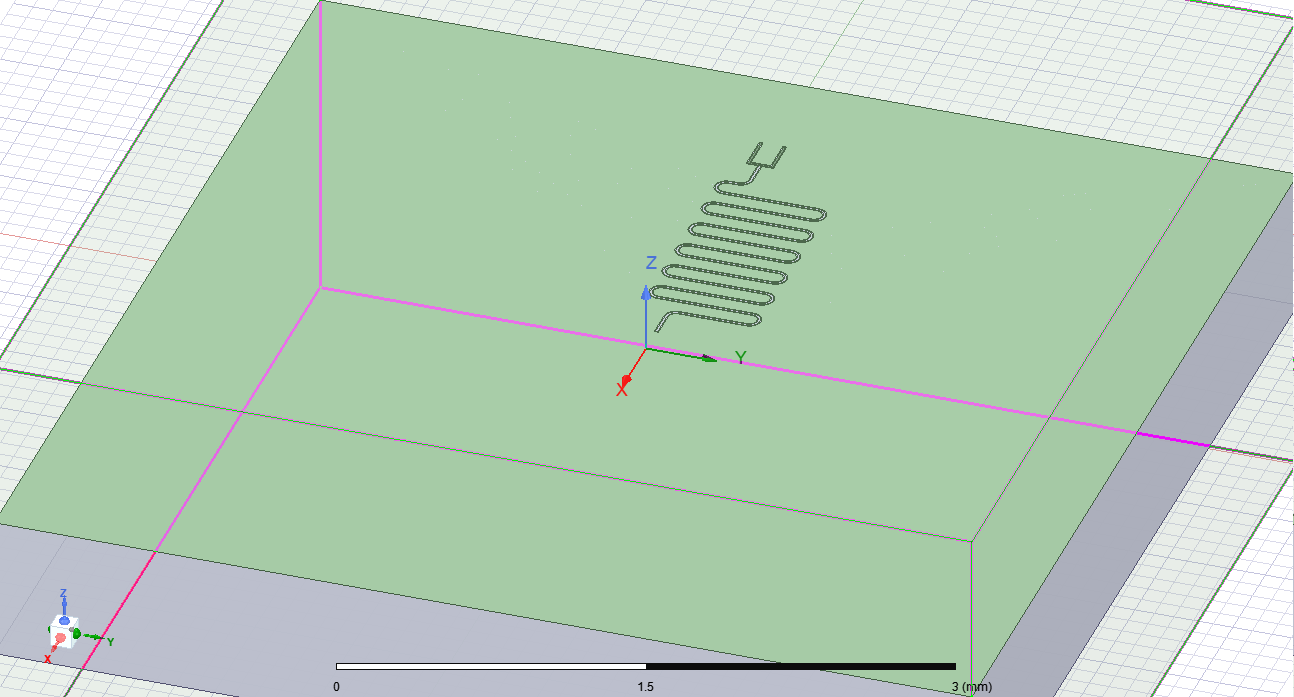

INFO 06:25PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


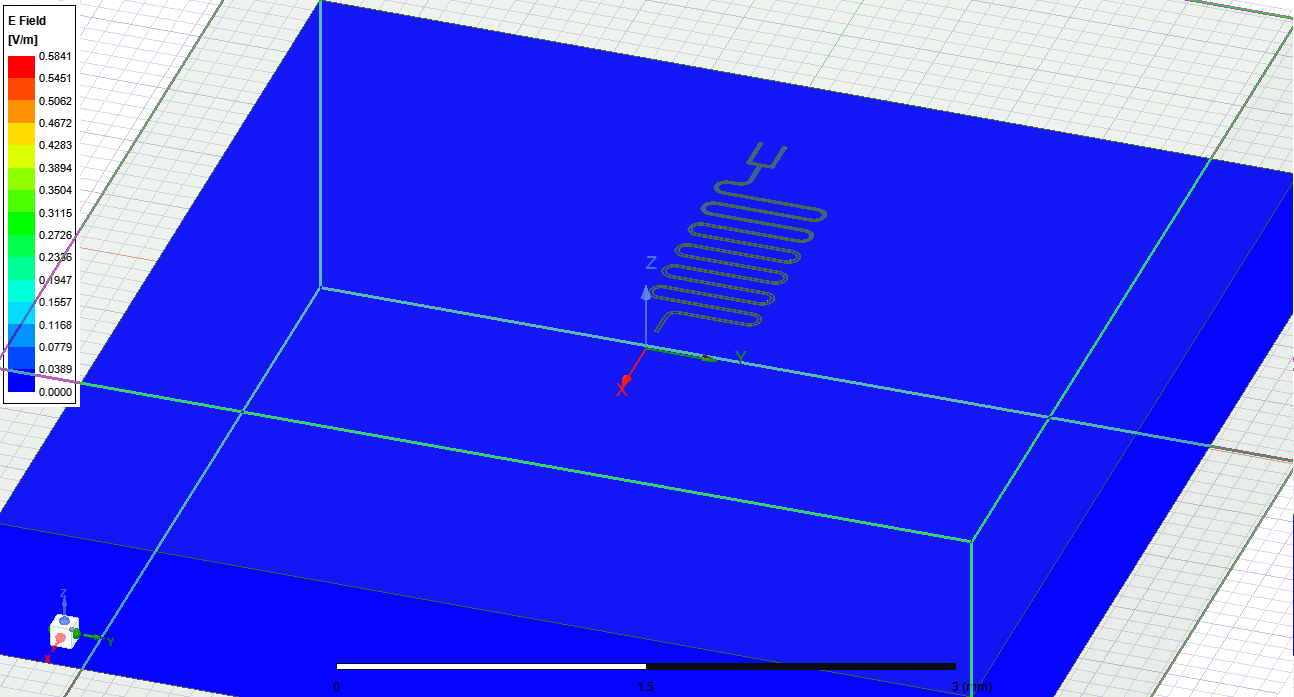

Design "CavitySweep_hfss" info:
	# eigenmodes    1
	# variations    1
Design "CavitySweep_hfss" info:
	# eigenmodes    1
	# variations    1
freq = 3.577 GHz


In [17]:
f_rough = get_freq(epra, hfss)

In [35]:
f_rough #Hz

3577305263.7400002

In [46]:
omega_rough = 2*np.pi*f_rough

In [47]:
Z_0 = 50 # Ohm
C_res = (np.pi / (2 * omega_rough * Z_0) ) * 1e15 # fF
C_res

1397.7001210046585

## LOM Sim

In [19]:
from qiskit_metal.analyses.quantization import LOManalysis
loma = LOManalysis(design, "q3d")

In [20]:
loma.sim.setup.reuse_selected_design = False
loma.sim.setup.reuse_setup = False

loma.sim.setup.max_passes = 30
loma.sim.setup.min_converged_passes = 1
loma.sim.setup.percent_error = 0.1
loma.sim.setup.auto_increase_solution_order = 'False'
loma.sim.setup.solution_order = 'Medium'

loma.sim.setup.name = 'lom_setup'

loma.sim.setup

{'name': 'lom_setup',
 'reuse_selected_design': False,
 'reuse_setup': False,
 'freq_ghz': 5.0,
 'save_fields': False,
 'enabled': True,
 'max_passes': 30,
 'min_passes': 2,
 'min_converged_passes': 1,
 'percent_error': 0.1,
 'percent_refinement': 30,
 'auto_increase_solution_order': 'False',
 'solution_order': 'Medium',
 'solver_type': 'Iterative'}

In [21]:
loma.sim.run(name = 'LOMv2.02', components=[coupler.name],
            open_terminations=[(coupler.name, pin_name) for pin_name in coupler.pin_names])

INFO 06:26PM [connect_project]: Connecting to Ansys Desktop API...
INFO 06:26PM [load_ansys_project]: 	Opened Ansys App
INFO 06:26PM [load_ansys_project]: 	Opened Ansys Desktop v2021.1.0
INFO 06:26PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    D:/Users/lfl/Documents/Ansoft/
	Project:   Project4
INFO 06:26PM [connect_design]: 	Opened active design
	Design:    CavitySweep_hfss [Solution type: Eigenmode]
INFO 06:26PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 06:26PM [connect]: 	Connected to project "Project4" and design "CavitySweep_hfss" 😀 

INFO 06:26PM [connect_design]: 	Opened active design
	Design:    LOMv2.02_q3d [Solution type: Q3D]
WARNING 06:26PM [connect_setup]: 	No design setup detected.
WARNING 06:26PM [connect_setup]: 	Creating Q3D default setup.
INFO 06:26PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 06:26PM [get_setup]: 	Opened setup `lom_setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 06:

In [22]:
cap_df = loma.sim.capacitance_matrix

In [23]:
cap_df.to_csv(f"{coupler.name}.csv")

In [24]:
C_tb = abs(cap_df[f"cap_body_0_{coupler.name}"].values[1]) #fF
C_tg = abs(cap_df[f"cap_body_0_{coupler.name}"].values[2]) #fF

In [40]:
f_est = np.sqrt((C_res)/(C_res+C_tg+C_tb))*f_rough
print(f"Expected Resonator Frequency is {f_est*1e-9} GHz")

Expected Resonator Frequency is 3.5679782645928237 GHz


In [48]:
omega_est = 2*np.pi*f_est

In [50]:
kappa = 0.5*Z_0*(omega_est**2)*((C_tb**2)/(C_res+C_tg+C_tb)) * 1e-15 # linear MHz

print(f" Kappa is {kappa*1e-6} MHz")

 Kappa is 2.679996522391537 MHz
